### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages - 2.5 marks

In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
pd.set_option("display.max_rows", 999)
%matplotlib inline
import seaborn as sns
#display the directory in which this notebook is executing
os.getcwd()

'D:\\PGP_AIML\\Assignment_1'

### 2. Read the 3 datasets into dataframes - 2.5 marks

#### Note: I invoked jupyter notebook from where the files are stored for this assignment. I wanted to make sure the directory from where jupyter notebook is invoked is where the assignment files are stored.

In [383]:
#creating a function with an argument to input file name
def read_file(pth):
    df = pd.read_csv(pth)
    return df

ratings = read_file('data.csv')

movie = read_file('item.csv')

user = read_file('user.csv')
#renaming columns by removing space
movie.columns = ['movieid','movietitle','releasedate','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
ratings.columns = ['userid','movieid','rating','timestamp']
user.columns = ['userid','age','gender','occupation','zipcode']


### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

In [384]:
print("==== Applying Shape ===== \n")
print("ratings:",ratings.shape, "\n movie:",movie.shape, "\n user:", user.shape)

==== Applying Shape ===== 

ratings: (100000, 4) 
 movie: (1681, 22) 
 user: (943, 5)


In [385]:
print("==== Applying Info ===== \n")
print("ratings:",ratings.info(), "\n movie:",movie.info(), "\n user:", user.info())

==== Applying Info ===== 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   userid     100000 non-null  int64
 1   movieid    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movieid      1681 non-null   int64 
 1   movietitle   1681 non-null   object
 2   releasedate  1681 non-null   object
 3   unknown      1681 non-null   int64 
 4   Action       1681 non-null   int64 
 5   Adventure    1681 non-null   int64 
 6   Animation    1681 non-null   int64 
 7   Childrens    1681 non-null   int64 
 8   Comedy       1681 non-null   int64 
 9   Crime        1681 non-null   

In [386]:
print("==== Applying Describe ===== \n")
print("\nratings:",ratings.describe(), "\n \n movie:",movie.describe(), "\n \n user:", user.describe())
print("==== ========= ===== \n")

==== Applying Describe ===== 


ratings:              userid        movieid         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08 
 
 movie:            movieid      unknown       Action    Adventure    Animation  \
count  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000   
mean    841.841761     0.000595     0.149316     0.080309     0.024985   
std     485.638077     0.024390     0.356506     0.271852     0.156126   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25

### Missing Values

In [387]:
print("======== Finding number of missing values ==============")
print("\n\n ====Missing value analysis for Ratings===:\n",ratings.isnull().sum())
print("\n================================\n")
print("\n\n ====Missing value analysis for Movie:======\n",movie.isnull().sum())
print("\n================================\n")
print("\n\n ====Missing value analysis for user:======\n",user.isnull().sum())

======== Finding number of missing values ==============


 ====Missing value analysis for Ratings===:
 userid       0
movieid      0
rating       0
timestamp    0
dtype: int64




 ====Missing value analysis for Movie:======
 movieid        0
movietitle     0
releasedate    0
unknown        0
Action         0
Adventure      0
Animation      0
Childrens      0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
dtype: int64




 ====Missing value analysis for user:======
 userid        0
age           0
gender        0
occupation    0
zipcode       0
dtype: int64


**Observations:**
1. Ratings dataset has 100K observations and 4 variables. Movie dataset has 1681 observations and 22 variables. User dataset has 943 observations and 5 variables. No missing values found
2.Average ratings is 3.52 and standard deviation is around 1.12. 25% of observations has less than 3 movie rating.
3.Average age of the user is around 34.05 years and maximum age of user is 73 years.



### 4. Find the number of movies per genre using the item data - 2.5 marks

In [388]:
def num_movies(genre):
    cnt = movie.apply(lambda x: True if x[genre] ==1 else False, axis =1)
    num_movies = len(cnt[cnt == True].index) 
    return num_movies
  
g = ['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime',
     'Documentary','Drama','Fantasy','Film-Noir','Horror','Musical',
     'Mystery','Romance','Sci-Fi','Thriller','War','Western']
for i in g:
    print('Number of movies in Genre:',i,':\t\t\t\t==>',num_movies(i))

Number of movies in Genre: unknown :				==> 1
Number of movies in Genre: Action :				==> 251
Number of movies in Genre: Adventure :				==> 135
Number of movies in Genre: Animation :				==> 42
Number of movies in Genre: Childrens :				==> 122
Number of movies in Genre: Comedy :				==> 505
Number of movies in Genre: Crime :				==> 109
Number of movies in Genre: Documentary :				==> 50
Number of movies in Genre: Drama :				==> 725
Number of movies in Genre: Fantasy :				==> 22
Number of movies in Genre: Film-Noir :				==> 24
Number of movies in Genre: Horror :				==> 92
Number of movies in Genre: Musical :				==> 56
Number of movies in Genre: Mystery :				==> 61
Number of movies in Genre: Romance :				==> 247
Number of movies in Genre: Sci-Fi :				==> 101
Number of movies in Genre: Thriller :				==> 251
Number of movies in Genre: War :				==> 71
Number of movies in Genre: Western :				==> 27


**Insights:**
I created a lambda function on movie dataframe by counting only 1's inside a function for axis=1. 
Then I created a list g with all genres and calling the function  within a loop. 

Among the 18 genres, Drama(725) seems to have more movies followed by Comedy (505).
Fantasy genre (22) followed by Film-Noir genere (24) has least number of movies.

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [389]:
indx = movie[movie['unknown'] ==1].index
movie.drop(indx,inplace = True)
movie.shape
print('Number of movies in Genre:',':\t\t\t\t==>',num_movies('unknown'))

Number of movies in Genre: :				==> 0


**Insights:**
I am creating a variable to hold genre is unknown (=1). Once the variable is created, I am passing that to the drop statement. To confirm that the drop worked, I am calling the function that is created in previous steps (num_movies) to count the number of movies that have unknown genre ==1. Result is 0 which confirms the record that had unknown genre is dropped.

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [390]:
#creating a list to pass all the column names from movie dataframe
col_list= list(movie)
#removing columns that are not needed to sum
unwanted = ['movieid','movietitle','releasedate', 'unknown']
col_list= [x for x in col_list if x not in unwanted]

#initializing more_than_one_genre colum so that if I run this cell multiple times it doesnt keep adding up
movie["number_of_genre"]="" 
movie['number_of_genre'] = movie[col_list].sum(axis=1)
#selecting only the columns needed to create a new dataframe per instruction
sel_cols = movie[['movietitle','number_of_genre']]
#creating a new dataframe with only movietitle and number_of_genre columns.
movie_new_df = sel_cols.copy()
#printing moview_new_df dataframe
print(movie_new_df)
#to count the number of movies that have more than 1 genre and assigning to x
x = len(movie_new_df[movie_new_df.number_of_genre >1])
print('\n\n Number of Movies that have more than 1 genre:',x)


                               movietitle  number_of_genre
0                              Toy Story                 3
1                              GoldenEye                 3
2                             Four Rooms                 1
3                             Get Shorty                 3
4                                Copycat                 3
...                                   ...              ...
1676                          Mat' i syn                 1
1677                           B. Monkey                 2
1678                       Sliding Doors                 2
1679                        You So Crazy                 1
1680  Scream of Stone (Schrei aus Stein)                 1

[1680 rows x 2 columns]


 Number of Movies that have more than 1 genre: 849


**Insights:**
There are 849 movies that have more than 1 genre


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

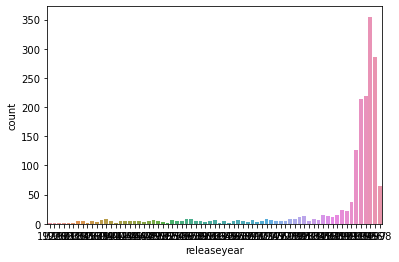

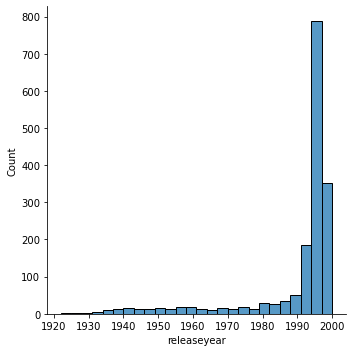

In [391]:
#your code here
movie['releaseyear'] = pd.DatetimeIndex(movie['releasedate']).year
sns.countplot(x="releaseyear", data=movie)
sns.displot(movie, x="releaseyear", binwidth=3) #Included this statement since x axis in countplot was all overlapped

<AxesSubplot:xlabel='rating', ylabel='count'>

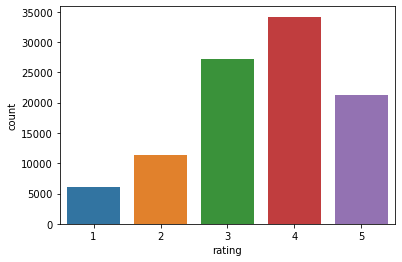

In [392]:
sns.countplot(x="rating", data=ratings)

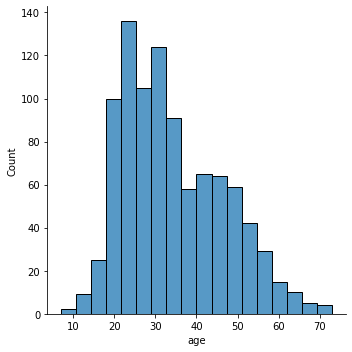

In [393]:
sns.displot(user, x="age")

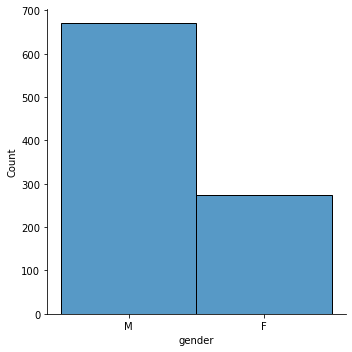

In [394]:
sns.displot(user, x="gender")

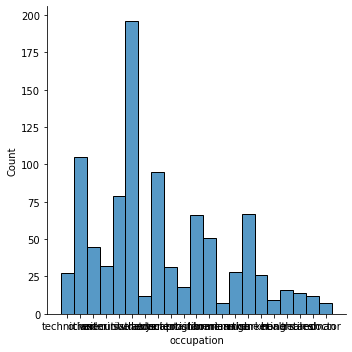

In [395]:
sns.displot(user, x="occupation")

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

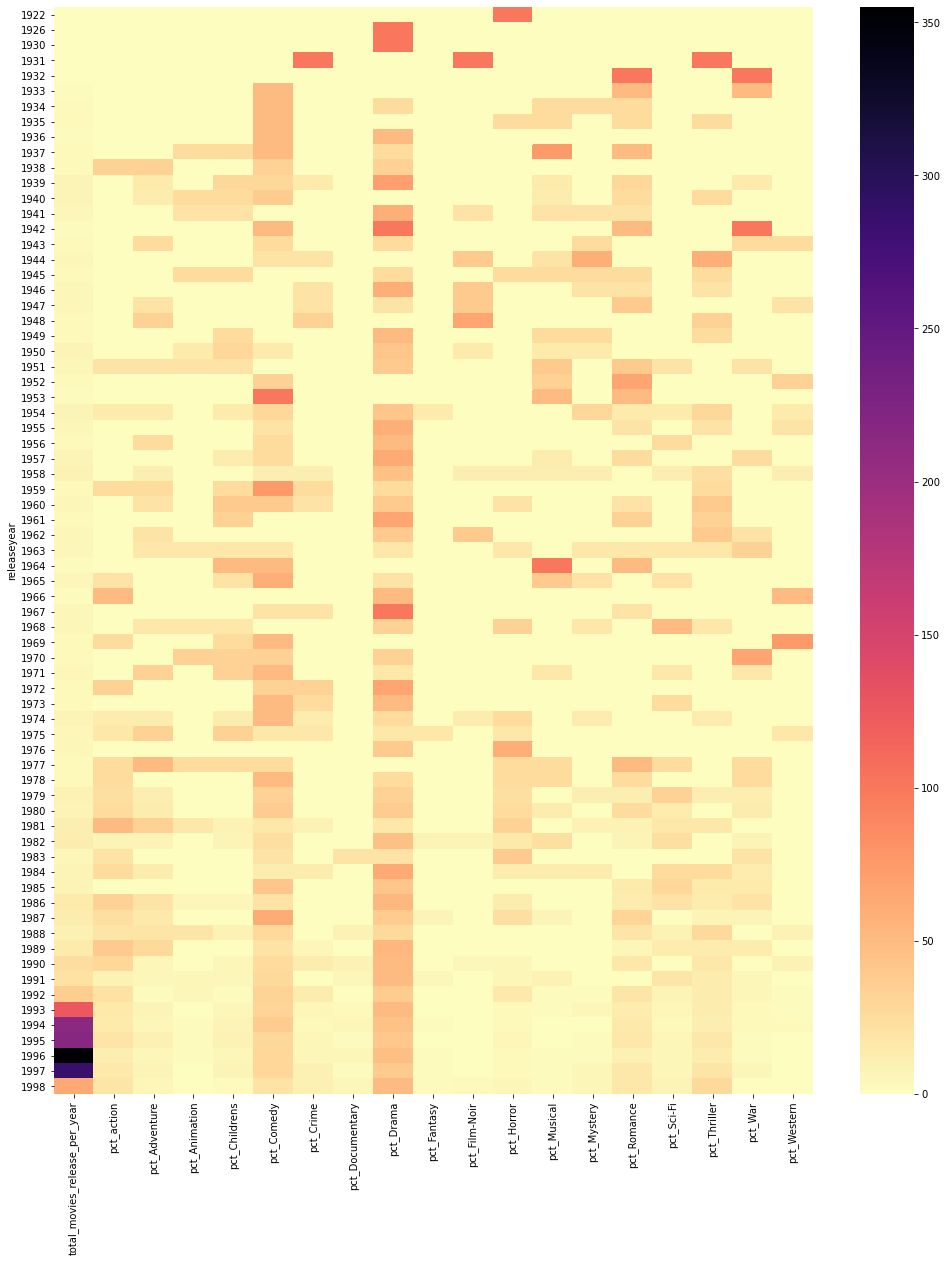

In [397]:
df = movie.groupby('releaseyear').sum()
df['total_movies_release_per_year'] = movie.groupby('releaseyear').agg({'movieid':'count'})
df['pct_action'] = df['Action']/df['total_movies_release_per_year']*100
df['pct_Adventure'] = df['Adventure']/df['total_movies_release_per_year']*100
df['pct_Animation'] = df['Animation']/df['total_movies_release_per_year']*100
df['pct_Childrens'] = df['Childrens']/df['total_movies_release_per_year']*100
df['pct_Comedy'] = df['Comedy']/df['total_movies_release_per_year']*100
df['pct_Crime'] = df['Crime']/df['total_movies_release_per_year']*100
df['pct_Documentary'] = df['Documentary']/df['total_movies_release_per_year']*100
df['pct_Drama'] = df['Drama']/df['total_movies_release_per_year']*100
df['pct_Fantasy'] = df['Fantasy']/df['total_movies_release_per_year']*100
df['pct_Film-Noir'] = df['Film-Noir']/df['total_movies_release_per_year']*100
df['pct_Horror'] = df['Horror']/df['total_movies_release_per_year']*100
df['pct_Musical'] = df['Musical']/df['total_movies_release_per_year']*100
df['pct_Mystery'] = df['Mystery']/df['total_movies_release_per_year']*100
df['pct_Romance'] = df['Romance']/df['total_movies_release_per_year']*100
df['pct_Sci-Fi'] = df['Sci-Fi']/df['total_movies_release_per_year']*100
df['pct_Thriller'] = df['Thriller']/df['total_movies_release_per_year']*100
df['pct_War'] = df['War']/df['total_movies_release_per_year']*100
df['pct_Western'] = df['Western']/df['total_movies_release_per_year']*100

df.drop(['movieid','unknown',
         'Action',  'Adventure',
         'Animation', 'Childrens',
         'Comedy', 'Crime',
         'Documentary', 'Drama',
         'Fantasy', 'Film-Noir',
         'Horror', 'Musical',
         'Mystery', 'Romance',
         'Sci-Fi', 'Thriller',
         'War', 'Western',
         'number_of_genre'
        ], axis=1, inplace=True)
df
#heatmap
plt.figure(figsize=(17,20))  #setting the figure size
sns.heatmap(df, cmap='magma_r')  #heat map to plot the above table
plt.show()
#

**Insights:**
Action movies started around 1966 and from 1990 onwards percentage of action movie genre has reduced.
Overall Drama has maintained its dominance consistently among other genres since 1926.


### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [398]:
#your code here
#merging movie and ratings dataframe together
#dig = pd.merge(ratings[['userid', 'movieid', 'rating']], movie, on='movieid')

items = ratings.groupby('movieid').count()

items = items[ratings.groupby('movieid').count().userid > 100].index


items = ratings.loc[ratings.movieid.isin(items)]


items = items.groupby('movieid').mean()


items = items.sort_values('rating',ascending = False)

order = items.index
rating_list = items.rating[0:25]
#rating_list
#movie.columns
items = movie.loc[movie['movieid'].isin(order)]
items
top_25_movies = items.set_index('movieid').loc[order]

top_25_movies = top_25_movies.iloc[0:25, 0]
top_25_movies = top_25_movies.reset_index()
top_25_movies['avg_rating'] =  rating_list.values
top_25_movies
#items = movies.loc[movies['movie id'].isin(order)]
#ig
#dig.to_csv('out.csv', index=False)  
#dig.groupby('movieid').agg({'rating':'count'}, {'rating':'average'} )

#d1 = dig.groupby('movieid').sum()
#d1['count_of_ratings'] = d1.groupby('movieid').agg({'movieid':'count'})

#dig.groupby('movie').count()

movieid                                         movietitle  avg_rating
0       408                                    Close Shave, A     4.491071
1       318                                  Schindler's List     4.466443
2       169                               Wrong Trousers, The     4.466102
3       483                                        Casablanca     4.456790
4        64                         Shawshank Redemption, The     4.445230
5       603                                       Rear Window     4.387560
6        12                               Usual Suspects, The     4.385768
7        50                                         Star Wars     4.358491
8       178                                      12 Angry Men     4.344000
9       134                                      Citizen Kane     4.292929
10      427                             To Kill a Mockingbird     4.292237
11      357                   One Flew Over the Cuckoo's Nest     4.291667
12       98                         Silence of the Lambs, The     4.289744
13      480                                North by Northwest     4.284916
14      127                                    Godfather, The     4.283293
15      285                                    Secrets & Lies     4.265432
16      272                                 Good Will Hunting     4.262626
17      657                         Manchurian Candidate, The     4.259542
18      474  Dr. Strangelove or: How I Learned to Stop Worr...    4.252577
19      174                           Raiders of the Lost Ark     4.252381
20      479                                           Vertigo     4.251397
21      313                                           Titanic     4.245714
22      511                                Lawrence of Arabia     4.231214
23      484                               Maltese Falcon, The     4.210145
24      172                          Empire Strikes Back, The     4.204360

### 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [399]:
movie.columns

Index(['movieid', 'movietitle', 'releasedate', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'number_of_genre',
       'releaseyear'],
      dtype='object')

In [400]:
#your code here

result = pd.merge(ratings, user, how='inner', on='userid')  
result = pd.merge(result, movie, how='inner', on='movieid')  
result.head()
result.drop(columns = ['userid','rating','movieid','timestamp','releaseyear', 'zipcode','unknown','number_of_genre', 'releasedate','movietitle','occupation','age'], inplace=True)
result
genre_by_gender = result.groupby('gender').sum().loc[:] 
genre_by_gender['total'] = genre_by_gender.sum(axis = 1)
genre_by_gender

Action  Adventure  Animation  Childrens  Comedy  Crime  Documentary  \
gender                                                                        
F         5442       3141        995       2232    8068   1794          187   
M        20147      10612       2610       4950   21764   6261          571   

        Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  \
gender                                                                         
F       11008      363        385    1197     1442     1314     5858    2629   
M       28887      989       1348    4120     3512     3931    13603   10101   

        Thriller   War  Western   total  
gender                                   
F           5086  2189      371   53701  
M          16786  7209     1483  158884

In [401]:
genre_by_gender[['Drama','Sci-Fi','Romance']].div(genre_by_gender.total, axis= 0) * 100

Drama    Sci-Fi    Romance
gender                                
F       20.498687  4.895626  10.908549
M       18.181189  6.357468   8.561592

**Conclusion:**

Men watch more drama than women:
<b> From the above pivot, it looks like Women watch a tad more Drama than Men. 20% Women vs 18% Men. </b>

    
Women watch more Sci-Fi than men:
   <b> 6.3% Men watch Sci-Fi and only 4.89% women watch Sci-Fi. Hence Men watch more Sci-Fi than Women </b>

       

Men watch more Romance than women:   
<b> Women watch more Romance than Men. 10.9% Women vs 8.56% Men. Handsdown Women watch more Romance than Men </b>